In [ ]:
pip install pymysql
pip install pandas


In [5]:
import pymysql


ModuleNotFoundError: No module named 'pymysql'

In [7]:
pip install pandas

In [9]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pymysql

In [13]:
import pandas as pd

In [15]:
print("Libraries are successfully installed!")

Libraries are successfully installed!


In [25]:
df = pd.read_csv ("C:/Users/Wanki/OneDrive/Desktop/air traffic.csv")

In [27]:
print(df.head())

   Year  Month   Dom_Pax  Int_Pax       Pax  Dom_Flt  Int_Flt     Flt  \
0  2003      1  43032450  4905830  47938280   785160    57667  842827   
1  2003      2  41166780  4245366  45412146   690351    51259  741610   
2  2003      3  49992700  5008613  55001313   797194    58926  856120   
3  2003      4  47033260  4345444  51378704   766260    55005  821265   
4  2003      5  49152352  4610834  53763186   789397    55265  844662   

    Dom_RPM   Int_RPM       RPM   Dom_ASM   Int_ASM       ASM  Dom_LF  Int_LF  \
0  36211422  12885980  49097402  56191300  17968572  74159872   64.44   71.71   
1  34148439  10715468  44863907  50088434  15587880  65676314   68.18   68.74   
2  41774564  12567068  54341633  57592901  17753174  75346075   72.53   70.79   
3  39465980  10370592  49836572  54639679  15528761  70168440   72.23   66.78   
4  41001934  11575026  52576960  55349897  15629821  70979718   74.08   74.06   

      LF  
0  66.20  
1  68.31  
2  72.12  
3  71.02  
4  74.07  


In [29]:
# Group data by Month and sum the passenger count
monthly_travel = df.groupby('Month')['Pax'].sum().reset_index()

# Display the aggregated monthly data
print("Monthly Travel Data:\n", monthly_travel)

Monthly Travel Data:
     Month         Pax
0       1  1172694815
1       2  1127424042
2       3  1364137826
3       4  1280062138
4       5  1349373594
5       6  1419218461
6       7  1495083268
7       8  1437618426
8       9  1240211974
9      10  1264669763
10     11  1202017325
11     12  1235366286


In [31]:
# Find the month with the highest travel frequency
highest_travel = monthly_travel[monthly_travel['Pax'] == monthly_travel['Pax'].max()]
print("Month with Highest Travel Frequency:\n", highest_travel)

# Find the month with the lowest travel frequency
lowest_travel = monthly_travel[monthly_travel['Pax'] == monthly_travel['Pax'].min()]
print("Month with Lowest Travel Frequency:\n", lowest_travel)


Month with Highest Travel Frequency:
    Month         Pax
6      7  1495083268
Month with Lowest Travel Frequency:
    Month         Pax
1      2  1127424042


In [33]:
# Group data by Month and calculate the average passengers
seasonal_trends = df.groupby('Month')['Pax'].mean().reset_index()

# Rename the column for clarity
seasonal_trends.rename(columns={'Pax': 'Avg_Passengers'}, inplace=True)

# Display the aggregated data
print("Seasonal Trends:\n", seasonal_trends)


Seasonal Trends:
     Month  Avg_Passengers
0       1    5.584261e+07
1       2    5.368686e+07
2       3    6.495894e+07
3       4    6.095534e+07
4       5    6.425589e+07
5       6    6.758183e+07
6       7    7.119444e+07
7       8    6.845802e+07
8       9    5.905771e+07
9      10    6.323349e+07
10     11    6.010087e+07
11     12    6.176831e+07


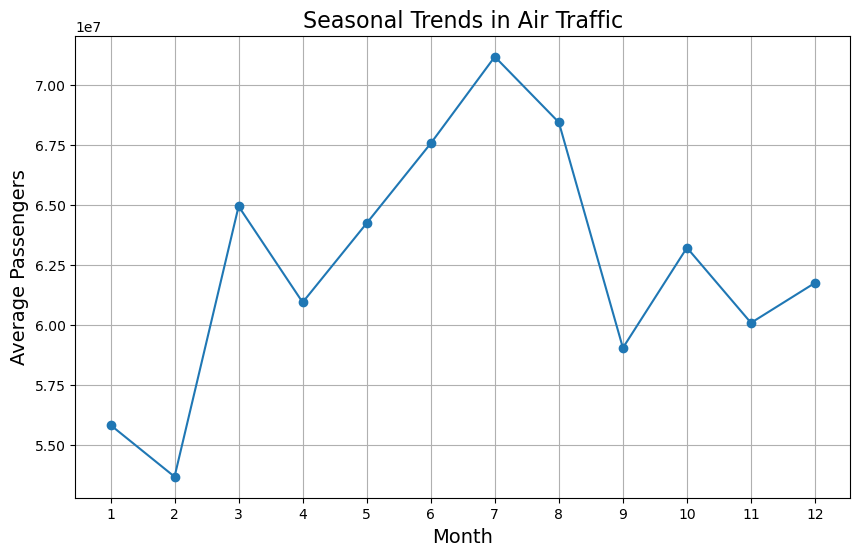

In [35]:
import matplotlib.pyplot as plt

# Plot seasonal trends
plt.figure(figsize=(10, 6))
plt.plot(seasonal_trends['Month'], seasonal_trends['Avg_Passengers'], marker='o')
plt.title('Seasonal Trends in Air Traffic', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Passengers', fontsize=14)
plt.xticks(range(1, 13))  # Ensure months are displayed as 1–12
plt.grid()
plt.show()


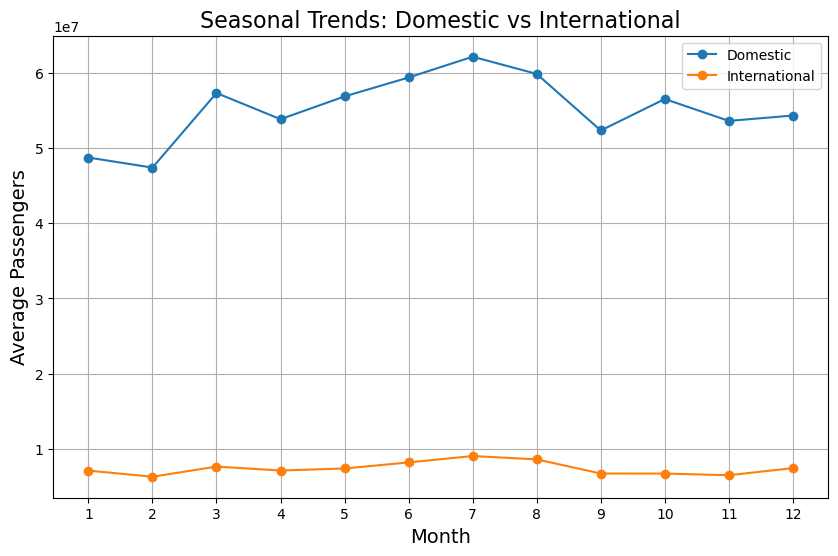

In [37]:
# Aggregate data for Domestic and International passengers
seasonal_domestic = df.groupby('Month')['Dom_Pax'].mean().reset_index()
seasonal_international = df.groupby('Month')['Int_Pax'].mean().reset_index()

# Plot the trends for Domestic and International passengers
plt.figure(figsize=(10, 6))
plt.plot(seasonal_domestic['Month'], seasonal_domestic['Dom_Pax'], marker='o', label='Domestic')
plt.plot(seasonal_international['Month'], seasonal_international['Int_Pax'], marker='o', label='International')
plt.title('Seasonal Trends: Domestic vs International', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Passengers', fontsize=14)
plt.xticks(range(1, 13))
plt.legend()
plt.grid()
plt.show()


C:\Users\Wanki\AppData\Local\Temp\ipykernel_24760\733733948.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['Pax'].resample('M').sum()
C:\Users\Wanki\AppData\Local\Temp\ipykernel_24760\733733948.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(monthly_data.index[-1], periods=12, freq='M')


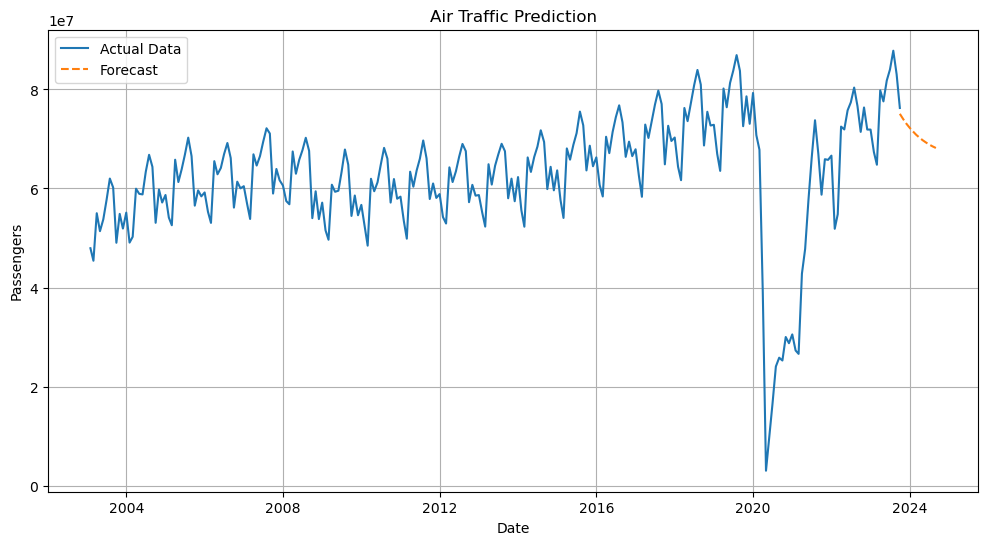

In [41]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Combine Year and Month into a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Set the Date column as the index and sort by date
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Aggregate monthly passenger data
monthly_data = df['Pax'].resample('M').sum()

# Fit an ARIMA model
model = ARIMA(monthly_data, order=(1, 1, 1))  # (p, d, q) can be tuned
model_fit = model.fit()

# Make future predictions (next 12 months)
forecast = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(monthly_data.index[-1], periods=12, freq='M')
forecast_data = forecast.predicted_mean
forecast_data.index = forecast_index

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Actual Data')
plt.plot(forecast_data, label='Forecast', linestyle='--')
plt.title('Air Traffic Prediction')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid()
plt.show()


C:\Users\Wanki\AppData\Local\Temp\ipykernel_24760\3849633419.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['Pax'].resample('M').sum()


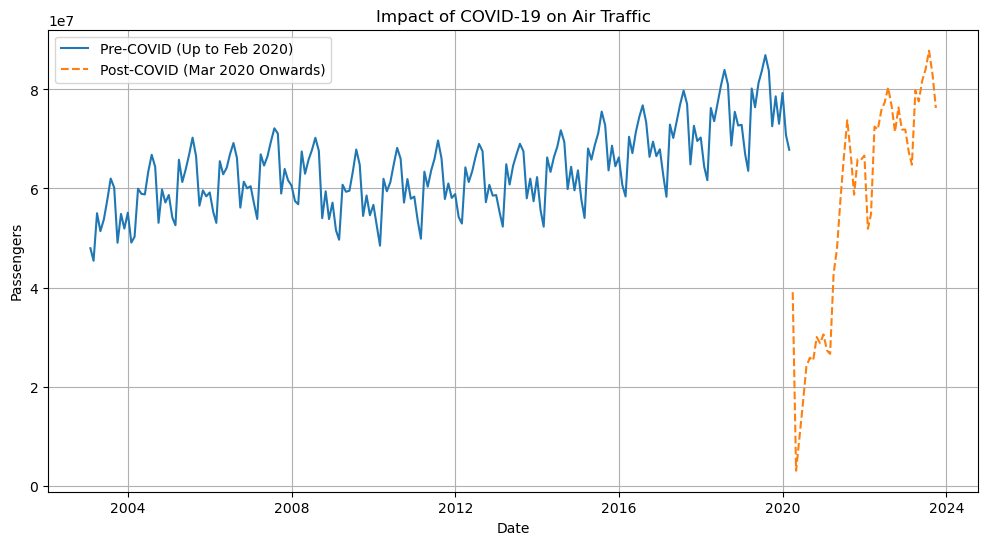

Average Monthly Passengers Pre-COVID: 63754555.86893204
Average Monthly Passengers Post-COVID: 57079986.255813956


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine Year and Month into a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Set the Date column as the index and sort by date
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Aggregate monthly passenger data
monthly_data = df['Pax'].resample('M').sum()

# Split data into pre-COVID and post-COVID
pre_covid = monthly_data[:'2020-02']
post_covid = monthly_data['2020-03':]

# Plot pre- and post-COVID trends
plt.figure(figsize=(12, 6))
plt.plot(pre_covid, label='Pre-COVID (Up to Feb 2020)')
plt.plot(post_covid, label='Post-COVID (Mar 2020 Onwards)', linestyle='--')
plt.title('Impact of COVID-19 on Air Traffic')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid()
plt.show()

# Summarise the impact
pre_covid_mean = pre_covid.mean()
post_covid_mean = post_covid.mean()

print(f"Average Monthly Passengers Pre-COVID: {pre_covid_mean}")
print(f"Average Monthly Passengers Post-COVID: {post_covid_mean}")
